### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Code to load data into colab from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow import keras

#  Import and read the charity_data.csv.
import pandas as pd 
path = "/content/gdrive/MyDrive/Neural Networks/Resources"
application_df = pd.read_csv(f'{path}/charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN", "NAME"], axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
type_counts = application_df.APPLICATION_TYPE.value_counts()
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

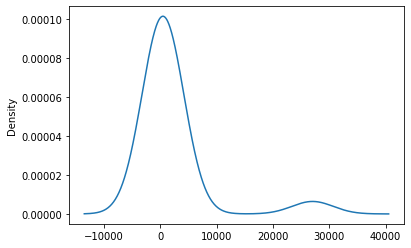

In [6]:
# Visualize the value counts of APPLICATION_TYPE
type_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_counts[type_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts.head(30)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
Name: CLASSIFICATION, dtype: int64

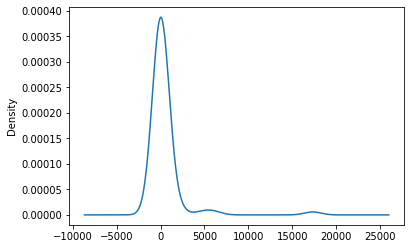

In [9]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df.drop(application_cat,1, inplace=True)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(["IS_SUCCESSFUL"],1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [ ]:
number_input_features = len(X_train_scaled[0])
number_input_features

43

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0]) # 43 input features, duplicate number of neurons (86) hidden layers will be 28 and 15
hidden_nodes_layer1 =  28
hidden_nodes_layer2 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 58)                2552      
_________________________________________________________________
dense_4 (Dense)              (None, 28)                1652      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 29        
Total params: 4,233
Trainable params: 4,233
Non-trainable params: 0
_________________________________________________________________


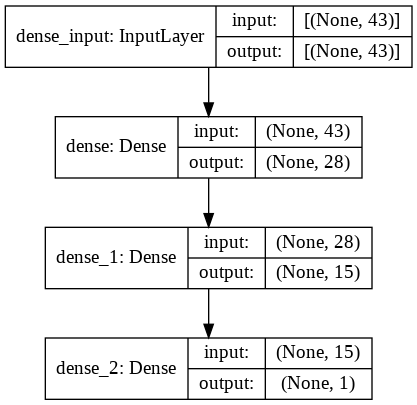

In [ ]:
# Show model structure
from tensorflow import keras
keras.utils.plot_model(nn, show_shapes=True)

In [ ]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5382 - accuracy: 0.7395
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.7403
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5382 - accuracy: 0.7391
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.7395
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5382 - accuracy: 0.7390

Epoch 00005: saving model to checkpoints/weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5376 - accuracy: 0.7395
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5376 - accuracy: 0.7397
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5381 - accuracy: 0.7399
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5376 - accuracy: 0.7388
Epoch 10/100
804/804 [===========

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5569 - accuracy: 0.7251
Loss: 0.5568833351135254, Accuracy: 0.7251312136650085


In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

### Deliverable 3: Optimize the Model

#### Attempt 1: Increase number of neurons

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0]) # 43 input features, duplicate number of neurons (86) hidden layers will be 58 and 28
hidden_nodes_layer1 =  58
hidden_nodes_layer2 = 28

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 58)                2552      
_________________________________________________________________
dense_21 (Dense)             (None, 28)                1652      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 29        
Total params: 4,233
Trainable params: 4,233
Non-trainable params: 0
_________________________________________________________________


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f3951062cb0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


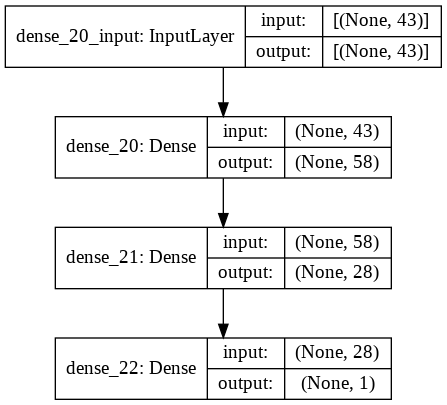

In [ ]:
# Show model structure
from tensorflow import keras
keras.utils.plot_model(nn, show_shapes=True)

In [ ]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5718 - accuracy: 0.7210
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5552 - accuracy: 0.7301
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7321
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7312
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.7331

Epoch 00005: saving model to checkpoints/weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5494 - accuracy: 0.7329
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.7327
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.7331
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7334
Epoch 10/100
804/804 [===========

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5571 - accuracy: 0.7243
Loss: 0.5570588111877441, Accuracy: 0.7243148684501648


In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_attempt1.h5")

#### Attempt 2: Increase number of layers, add Dropout layers and change activation functions

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0]) # 43 input features, triplicate number of neurons (86) hidden layers will be 58 and 28
hidden_nodes_layer1 =  88
hidden_nodes_layer2 = 47
hidden_nodes_layer3 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Adding Dropout Layer in order to prevent overfitting
nn.add(
     tf.keras.layers.Dropout(.2, input_shape=(2,))
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="softmax"))
#Adding Dropout Layer
nn.add(
     tf.keras.layers.Dropout(.2, input_shape=(2,))
)

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="softmax"))
#Adding Dropout Layer
nn.add(
     tf.keras.layers.Dropout(.2, input_shape=(2,))
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 88)                3872      
_________________________________________________________________
dropout_8 (Dropout)          (None, 88)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 47)                4183      
_________________________________________________________________
dropout_9 (Dropout)          (None, 47)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 25)                1200      
_________________________________________________________________
dropout_10 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

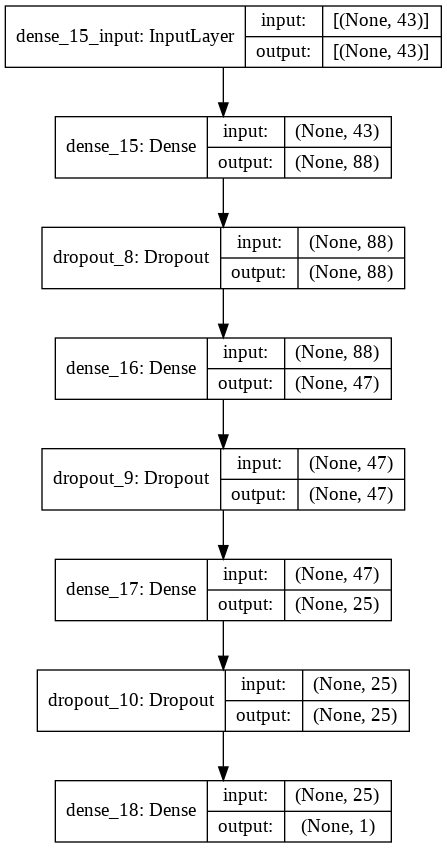

In [ ]:
# Show model structure
from tensorflow import keras
keras.utils.plot_model(nn, show_shapes=True)

In [ ]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6527 - accuracy: 0.6499
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6090 - accuracy: 0.6916
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5972 - accuracy: 0.7009
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5907 - accuracy: 0.7084
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5844 - accuracy: 0.7164

Epoch 00005: saving model to checkpoints/weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5798 - accuracy: 0.7218
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5786 - accuracy: 0.7218
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5749 - accuracy: 0.7243
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5743 - accuracy: 0.7246
Epoch 10/100
804/804 [===========

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5544 - accuracy: 0.7257
Loss: 0.5543882250785828, Accuracy: 0.7257142663002014


In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_attempt2.h5")

#### Attempt 3: Auto Optimization

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 97 kB 3.0 MB/s 


In [ ]:
# Import the kerastuner library
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 39s]
val_accuracy: 0.7289795875549316

Best val_accuracy So Far: 0.7289795875549316
Total elapsed time: 00h 17m 58s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5576 - accuracy: 0.7290
Loss: 0.5575676560401917, Accuracy: 0.7289795875549316


In [ ]:
# Export our model to HDF5 file
best_model.save("AlphabetSoupCharity_attempt3.h5")

In [ ]:
# Check the structure of the model
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 308       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 28        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 8

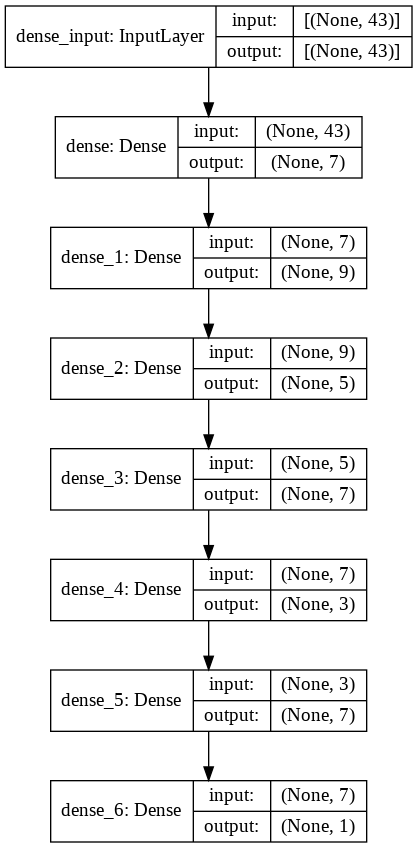

In [ ]:
# Show model structure
from tensorflow import keras
keras.utils.plot_model(best_model, show_shapes=True)

### Confusion Matrix per Model
#### Original Model

In [55]:
# Load Original Model and create a confusion matrix with the precitions vector
from sklearn.metrics import confusion_matrix, classification_report
model = keras.models.load_model('AlphabetSoupCharity.h5')
predictions = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, np.round(abs(predictions)))

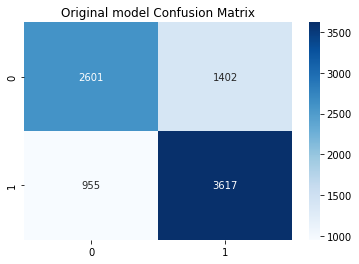

<Figure size 432x288 with 0 Axes>

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
# Print the confusion matrix with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Original model Confusion Matrix")
plt.savefig("Original_ConfusionMatrix")
plt.show()

#### Attempt 1

In [57]:
# Load Attempt 1 Model and create a confusion matrix with the precitions vector
from sklearn.metrics import confusion_matrix, classification_report
model = keras.models.load_model('AlphabetSoupCharity_attempt1.h5')
predictions = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, np.round(abs(predictions)))

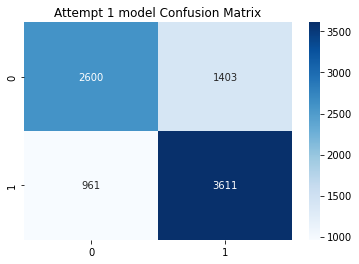

<Figure size 432x288 with 0 Axes>

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
# Print the confusion matrix with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Attempt 1 model Confusion Matrix")
plt.savefig("Attempt1_ConfusionMatrix.png")
plt.show()

#### Attempt 2

In [59]:
# Load Attempt 2 Model and create a confusion matrix with the precitions vector
from sklearn.metrics import confusion_matrix, classification_report
model = keras.models.load_model('AlphabetSoupCharity_attempt2.h5')
predictions = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, np.round(abs(predictions)))

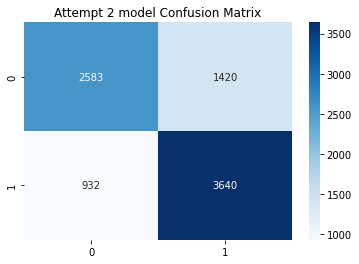

<Figure size 432x288 with 0 Axes>

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
# Print the confusion matrix with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Attempt 2 model Confusion Matrix")
plt.savefig("Attempt2_ConfusionMatrix.png")
plt.show()

#### Attempt 3

In [61]:
# Load Attempt 3 Model and create a confusion matrix with the precitions vector
from sklearn.metrics import confusion_matrix, classification_report
model = keras.models.load_model('AlphabetSoupCharity_attempt3.h5')
predictions = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, np.round(abs(predictions)))

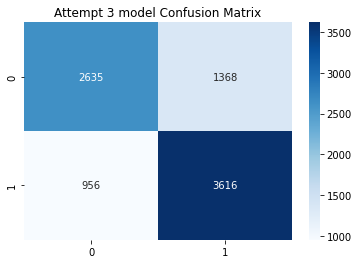

<Figure size 432x288 with 0 Axes>

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
# Print the confusion matrix with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Attempt 3 model Confusion Matrix")
plt.savefig("Attempt3_ConfusionMatrix.png")
plt.show()